<a href="https://colab.research.google.com/github/AlejoGalloM/MachineLearning/blob/master/Final_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***A Multi-Scale Fusion Convolutional Neural Network for Face Detection***
  En el presente trabajo se encuentran los procesos realizados para la implementación del contenido del articulo en el que se realiza un proceso de detecciómn de rostros multiescala por medio de redes neuronales convolucionales.

---

## ***Integrantes***

*   Alejandro Cifuentes Montoya
*   Alejandro Gallo Murillo



Se importan las librerías necesarias para la implementación del artículo

In [16]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

## Indroducción

*La detección de rostros ha sido una posición dominante en la visión por computadora. El etector de cara propuesto por Viola y Jones utiliza características similares a Haar y clasificadores AdaBoost en cascada. El detector es rápido y preciso, lo que puede lograr un rendimiento aceptable en tiempo real. Por lo tanto, es un hito que en el desarrollo de la tecnología de detección de rostros en ese momento y también marcó la investigación. 
 En el campo de la visión por ordenador se aplica en la práctica. Después del detector de rostros Viola-Jones, cada vez más 
 los investigadores han mejorado el uso de características simples para lograr la tarea de detección de rostros. Sin embargo, el uso de características artificiales no se puede expresar completamente la información de la cara.*

*Además de la arquitectura en cascada, el modelo de pieza deformable (DPM) es otro método para la detección de rostros. Los modelos DPM aprenden filtros raíz, filtros de piezas y sus relaciones espaciales a través de la máquina de vectores de soporte (SVM). Usé modelos DPM que tienen una gran robustez para la oclusión. Pero es computacionalmente costoso construir pirámides de características. Recientemente, la red neuronal convolucional (CNN) ha logrado un rendimiento de impresión en tareas de visión por computadora, como la clasificación y el reconocimiento de imágenes. Yang y col. demuestra que los modelos CNN de atributos faciales se pueden aplicar para encontrar propuestas de rostros y las ventanas propuestas pueden procesarse aún más mediante un modelo CNN similar a AlexNet. Sin embargo, este método lleva mucho tiempo en la práctica debido a su compleja estructura CNN. Li y col. propone una arquitectura en cascada llamada Cascade CNN para la detección de rostros en el mundo real. Sin embargo, su red de calibración para el cuadro delimitador necesita un gasto de cálculo adicional. Zhang y col. propone una CNN en cascada multitarea para la detección y alineación de rostros. Consideró la relevancia de la detección y alineación de rostros, pero el proceso de capacitación es bastante costoso. Farfade y col. introduce el detector de rostros denso profundo (DDFD), que afina el AlexNet previamente entrenado para detectar rostros en una amplia gama de orientaciones. En, Huang et al. propone un marco FCN de un extremo a otro llamado DenseBox para la detección de rostros. Sin embargo, DDFD y DenseBox solo adoptan un modelo de una sola escala.*




A diferencia de las funciones hechas a mano antes mencionadas, CNN puede aprender automáticamente funciones para captar variaciones visuales complejas mediante una gran cantidad de datos de entrenamiento, y puede ser fácilmente en aceleración paralela de núcleos de GPU en función de su fase de prueba. Por lo tanto, se propone un nuevo modelo llamado Red neuronal convolucional de fusión de múltiples escalas (MSF-CNN) basado en CNN. En este documento, nuestras principales contribuciones son las siguientes: La función se fusiona mediante el uso de núcleos de convolución de múltiples escalas en el proceso de entrenamiento de funciones. La red disminuye la complejidad del modelo en comparación con los métodos existentes de la CNN en cascada. El algoritmo logra un aprendizaje de un extremo a otro en comparación con el entrenamiento separado en cascada.

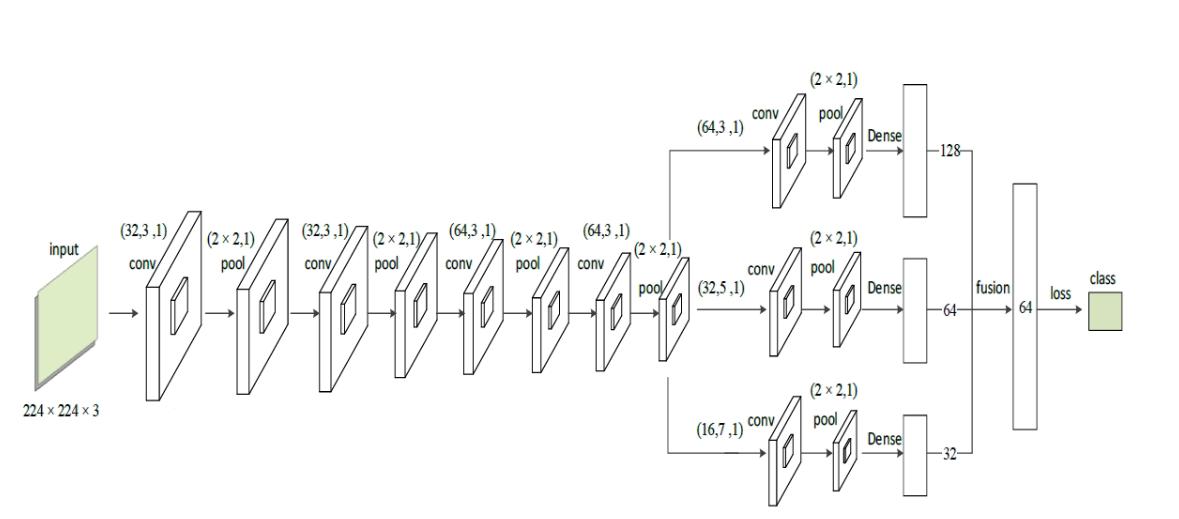

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# La librería cv2 se usa para la lectura, escritura y despliegue de imagenes.
image = cv2.imread('drive/MyDrive/data/que-es-la-familia.jpg') #--imread() Ayuda a cargar una oimagen en el notebook incluyendo sus pixeles

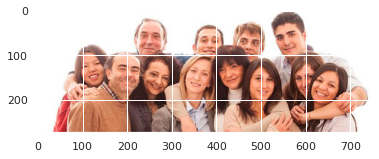

In [20]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# OpenCV carga las imagenes en formato BGR por defecto, lo que se hizo anteriormente es convertirlo a formato RGB para poder trabajar con la imagen
plt.show()

Vemos las dimensiones de la imagen:

In [21]:
image.shape

(273, 750, 3)


La forma de la imagen es 220 x 350 x 3 esto significa que la imagen cuenta con 77000 pixeles donde cada pixel tiene un valor de 3 canales de colores RGB

La funcion 

```
image[0][0]
```
Se encarga de mostrar la cantidad de elementos que hay de R-G-B



In [22]:
image[0][0]

array([255, 255, 255], dtype=uint8)

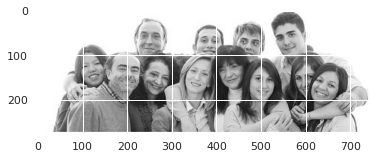

In [26]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

Implementamos el método para detectar los rostros en la imagen ingresada.

In [31]:
haar_cascade_face = cv2.CascadeClassifier('drive/MyDrive/data/haarcascade_frontalface_default.xml')
faces_rects = haar_cascade_face.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 1);
print('Faces found: ', len(faces_rects))

Faces found:  12


Se obtienen los rectangulos con las coordenadas de acuerdo a los rostros encontrados para luego mostrarlos sobre la imagen ingresada.

In [32]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

*Proceso de detección
De hecho, la detección de rostros es un problema de dos clasificaciones. Debido a que CNN se basa en el método de aprendizaje de características, por lo tanto, el método propuesto solo se utiliza para extraer las características para entrenar un clasificador. Al detectar la posición de la cara en una imagen o video original, se deben considerar las medidas apropiadas para transformar la tarea de detección en una tarea de clasificación.
Aquí, se elige la estrategia de clasificación de Viola & Jones para escanear la pirámide de imágenes basada en ventanas de diapositivas. El proceso de detección se puede describir en tres pasos de la siguiente manera:*

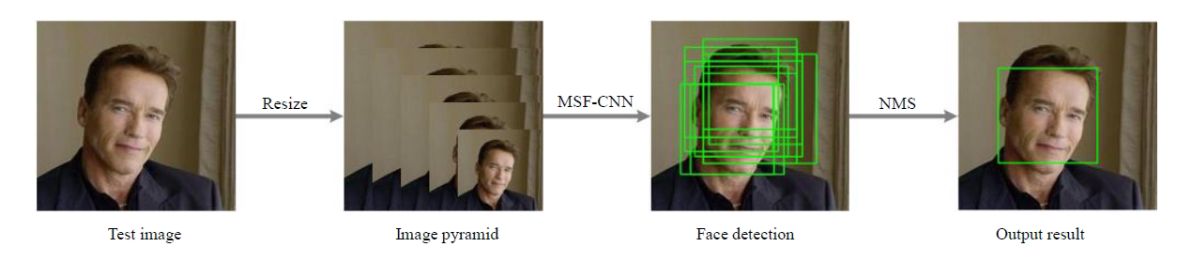

*En primer lugar, se debe construir la pirámide de imágenes basada en la imagen original.
En segundo lugar, se aplica una ventana deslizante de tamaño m × n para escanear la imagen de cada capa de la pirámide de imágenes desde la parte superior izquierda. El clasificador etiqueta una ventana como una cara con un cuadro rectangular marcado como caras candidatas.
Finalmente, la supresión no máxima (NMS) se emplea para fusionar candidatos muy superpuestos y generar el resultado de detección final.*

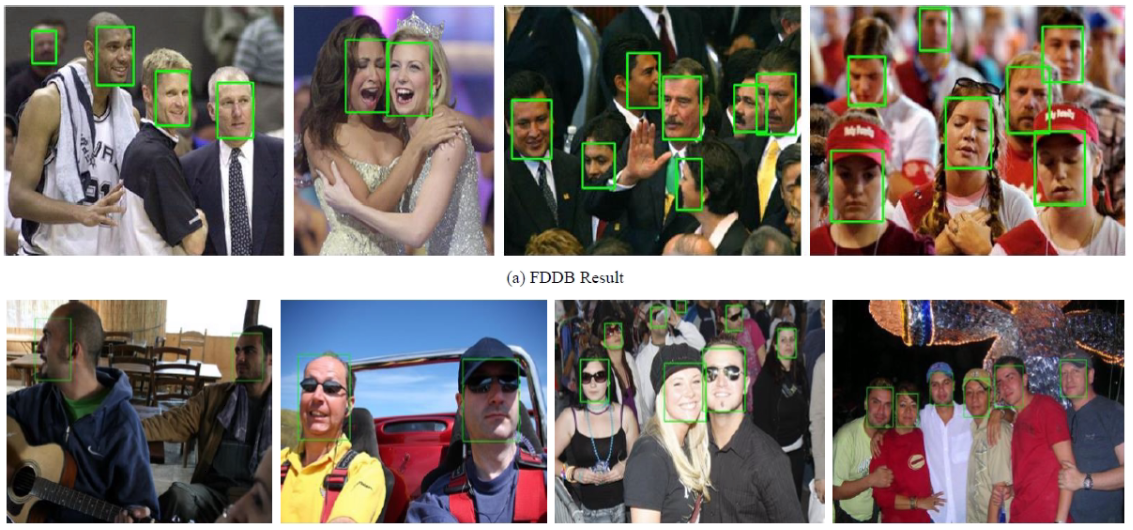

El resultado del proceso sería el siguiente.

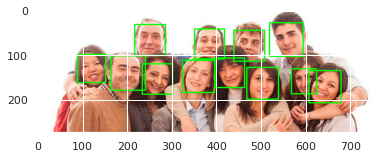

In [33]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()